In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [2]:
#implement these clustering algorithms
#kmeans
#DBSCAN
#hierarchical
#Gaussian Mixture Model

In [3]:
df = pd.read_csv('../Clustering/csv_files/cleaned_players.csv')
df.head()

Height (in)  Weight (lbs)   40 Yard  Bench Press  Vert Leap (in)  \
0    -1.488834     -0.933303 -1.289143    -0.991468       -0.050021   
1     0.400950      0.575394  0.501981     0.977647       -1.364373   
2     0.476541      0.863821  1.023035     0.485368       -1.125400   
3    -0.619533     -0.844556 -0.572694    -1.976025       -0.050021   
4     1.043476      0.730701  0.143756    -0.171003       -0.886427   

   Broad Jump (in)   Shuttle     3Cone  ProBowl  POS_C  ...  POS_DT  POS_K  \
0         0.496894  0.719184 -0.839898        0    0.0  ...     0.0    0.0   
1        -1.062715  0.719184  1.249482        0    1.0  ...     0.0    0.0   
2        -0.854767 -0.340479  1.249482        0    1.0  ...     0.0    0.0   
3         0.080999  0.405210 -0.736719        0    0.0  ...     0.0    0.0   
4        -0.542845  0.287470  0.114510        0    0.0  ...     0.0    0.0   

   POS_LB  POS_OG  POS_OT  POS_QB  POS_RB  POS_S  POS_TE  POS_WR  
0     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0     0.0    0.0     0.0     1.0  
4     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0  

[5 rows x 22 columns]

In [4]:
#df.drop(['ProBowl'], axis=1, inplace=True)
df.tail()

Height (in)  Weight (lbs)   40 Yard  Bench Press  Vert Leap (in)  \
12220     0.854498      0.841634 -0.084205     0.649461        0.002553   
12221     1.376078      2.061904  0.632245     0.682280       -0.766940   
12222     0.336697      1.396302  1.055601     1.634019       -0.408481   
12223     0.620165      1.196622  0.990470     0.813554       -1.483859   
12224     0.242208      0.220406 -1.354275     0.485368        1.383818   

       Broad Jump (in)   Shuttle     3Cone  ProBowl  POS_C  ...  POS_DT  \
12220         0.184972  0.405210  0.475637        0    0.0  ...     0.0   
12221         0.080999  1.190146  1.455840        0    0.0  ...     0.0   
12222        -0.750793  0.444457  0.862559        0    1.0  ...     0.0   
12223        -0.542845  0.954665  0.965739        0    0.0  ...     1.0   
12224         1.952529 -0.301232 -0.298207        0    0.0  ...     0.0   

       POS_K  POS_LB  POS_OG  POS_OT  POS_QB  POS_RB  POS_S  POS_TE  POS_WR  
12220    0.0     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0  
12221    0.0     0.0     0.0     1.0     0.0     0.0    0.0     0.0     0.0  
12222    0.0     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0  
12223    0.0     0.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0  
12224    0.0     1.0     0.0     0.0     0.0     0.0    0.0     0.0     0.0  

[5 rows x 22 columns]

In [5]:
df.describe()

Height (in)  Weight (lbs)       40 Yard   Bench Press  Vert Leap (in)  \
count  1.222500e+04  1.222500e+04  1.222500e+04  1.222500e+04    1.222500e+04   
mean   5.498351e-16 -1.069447e-16  1.460027e-15 -4.301036e-16   -1.859907e-15   
std    1.000041e+00  1.000041e+00  1.000041e+00  1.000041e+00    1.000041e+00   
min   -4.625876e+00 -2.131386e+00 -1.973027e+00 -2.960583e+00   -3.515131e+00   
25%   -7.026840e-01 -8.223696e-01 -8.006549e-01 -6.632821e-01   -6.474536e-01   
50%    6.078875e-02 -2.011414e-01 -2.144688e-01 -5.613830e-02    6.946562e-02   
75%    7.600088e-01  7.750742e-01  6.648105e-01  6.494612e-01    6.668983e-01   
max    3.273422e+00  3.259987e+00  4.247059e+00  9.018199e+00    3.415089e+00   

       Broad Jump (in)       Shuttle         3Cone       ProBowl  \
count     1.222500e+04  1.222500e+04  1.222500e+04  12225.000000   
mean      8.648569e-16 -1.487926e-16 -1.255437e-16      0.065685   
std       1.000041e+00  1.000041e+00  1.000041e+00      0.247741   
min      -1.104421e+01 -2.695288e+00 -2.671330e+00      0.000000   
25%      -5.428451e-01 -6.937006e-01 -7.367188e-01      0.000000   
50%       8.099855e-02 -1.442453e-01 -2.724122e-01      0.000000   
75%       7.048422e-01  6.014441e-01  5.788166e-01      0.000000   
max       3.512138e+00  1.092335e+01  5.944137e+00      1.000000   

              POS_C  ...        POS_DT         POS_K        POS_LB  \
count  12225.000000  ...  12225.000000  12225.000000  12225.000000   
mean       0.030920  ...      0.073211      0.027321      0.120573   
std        0.173109  ...      0.260493      0.163024      0.325643   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      0.000000   
max        1.000000  ...      1.000000      1.000000      1.000000   

             POS_OG        POS_OT        POS_QB        POS_RB         POS_S  \
count  12225.000000  12225.000000  12225.000000  12225.000000  12225.000000   
mean       0.062658      0.075992      0.052025      0.109448      0.078282   
std        0.242358      0.264996      0.222086      0.312213      0.268626   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             POS_TE        POS_WR  
count  12225.000000  12225.000000  
mean       0.057751      0.133415  
std        0.233281      0.340037  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        0.000000      0.000000  
max        1.000000      1.000000  

[8 rows x 22 columns]

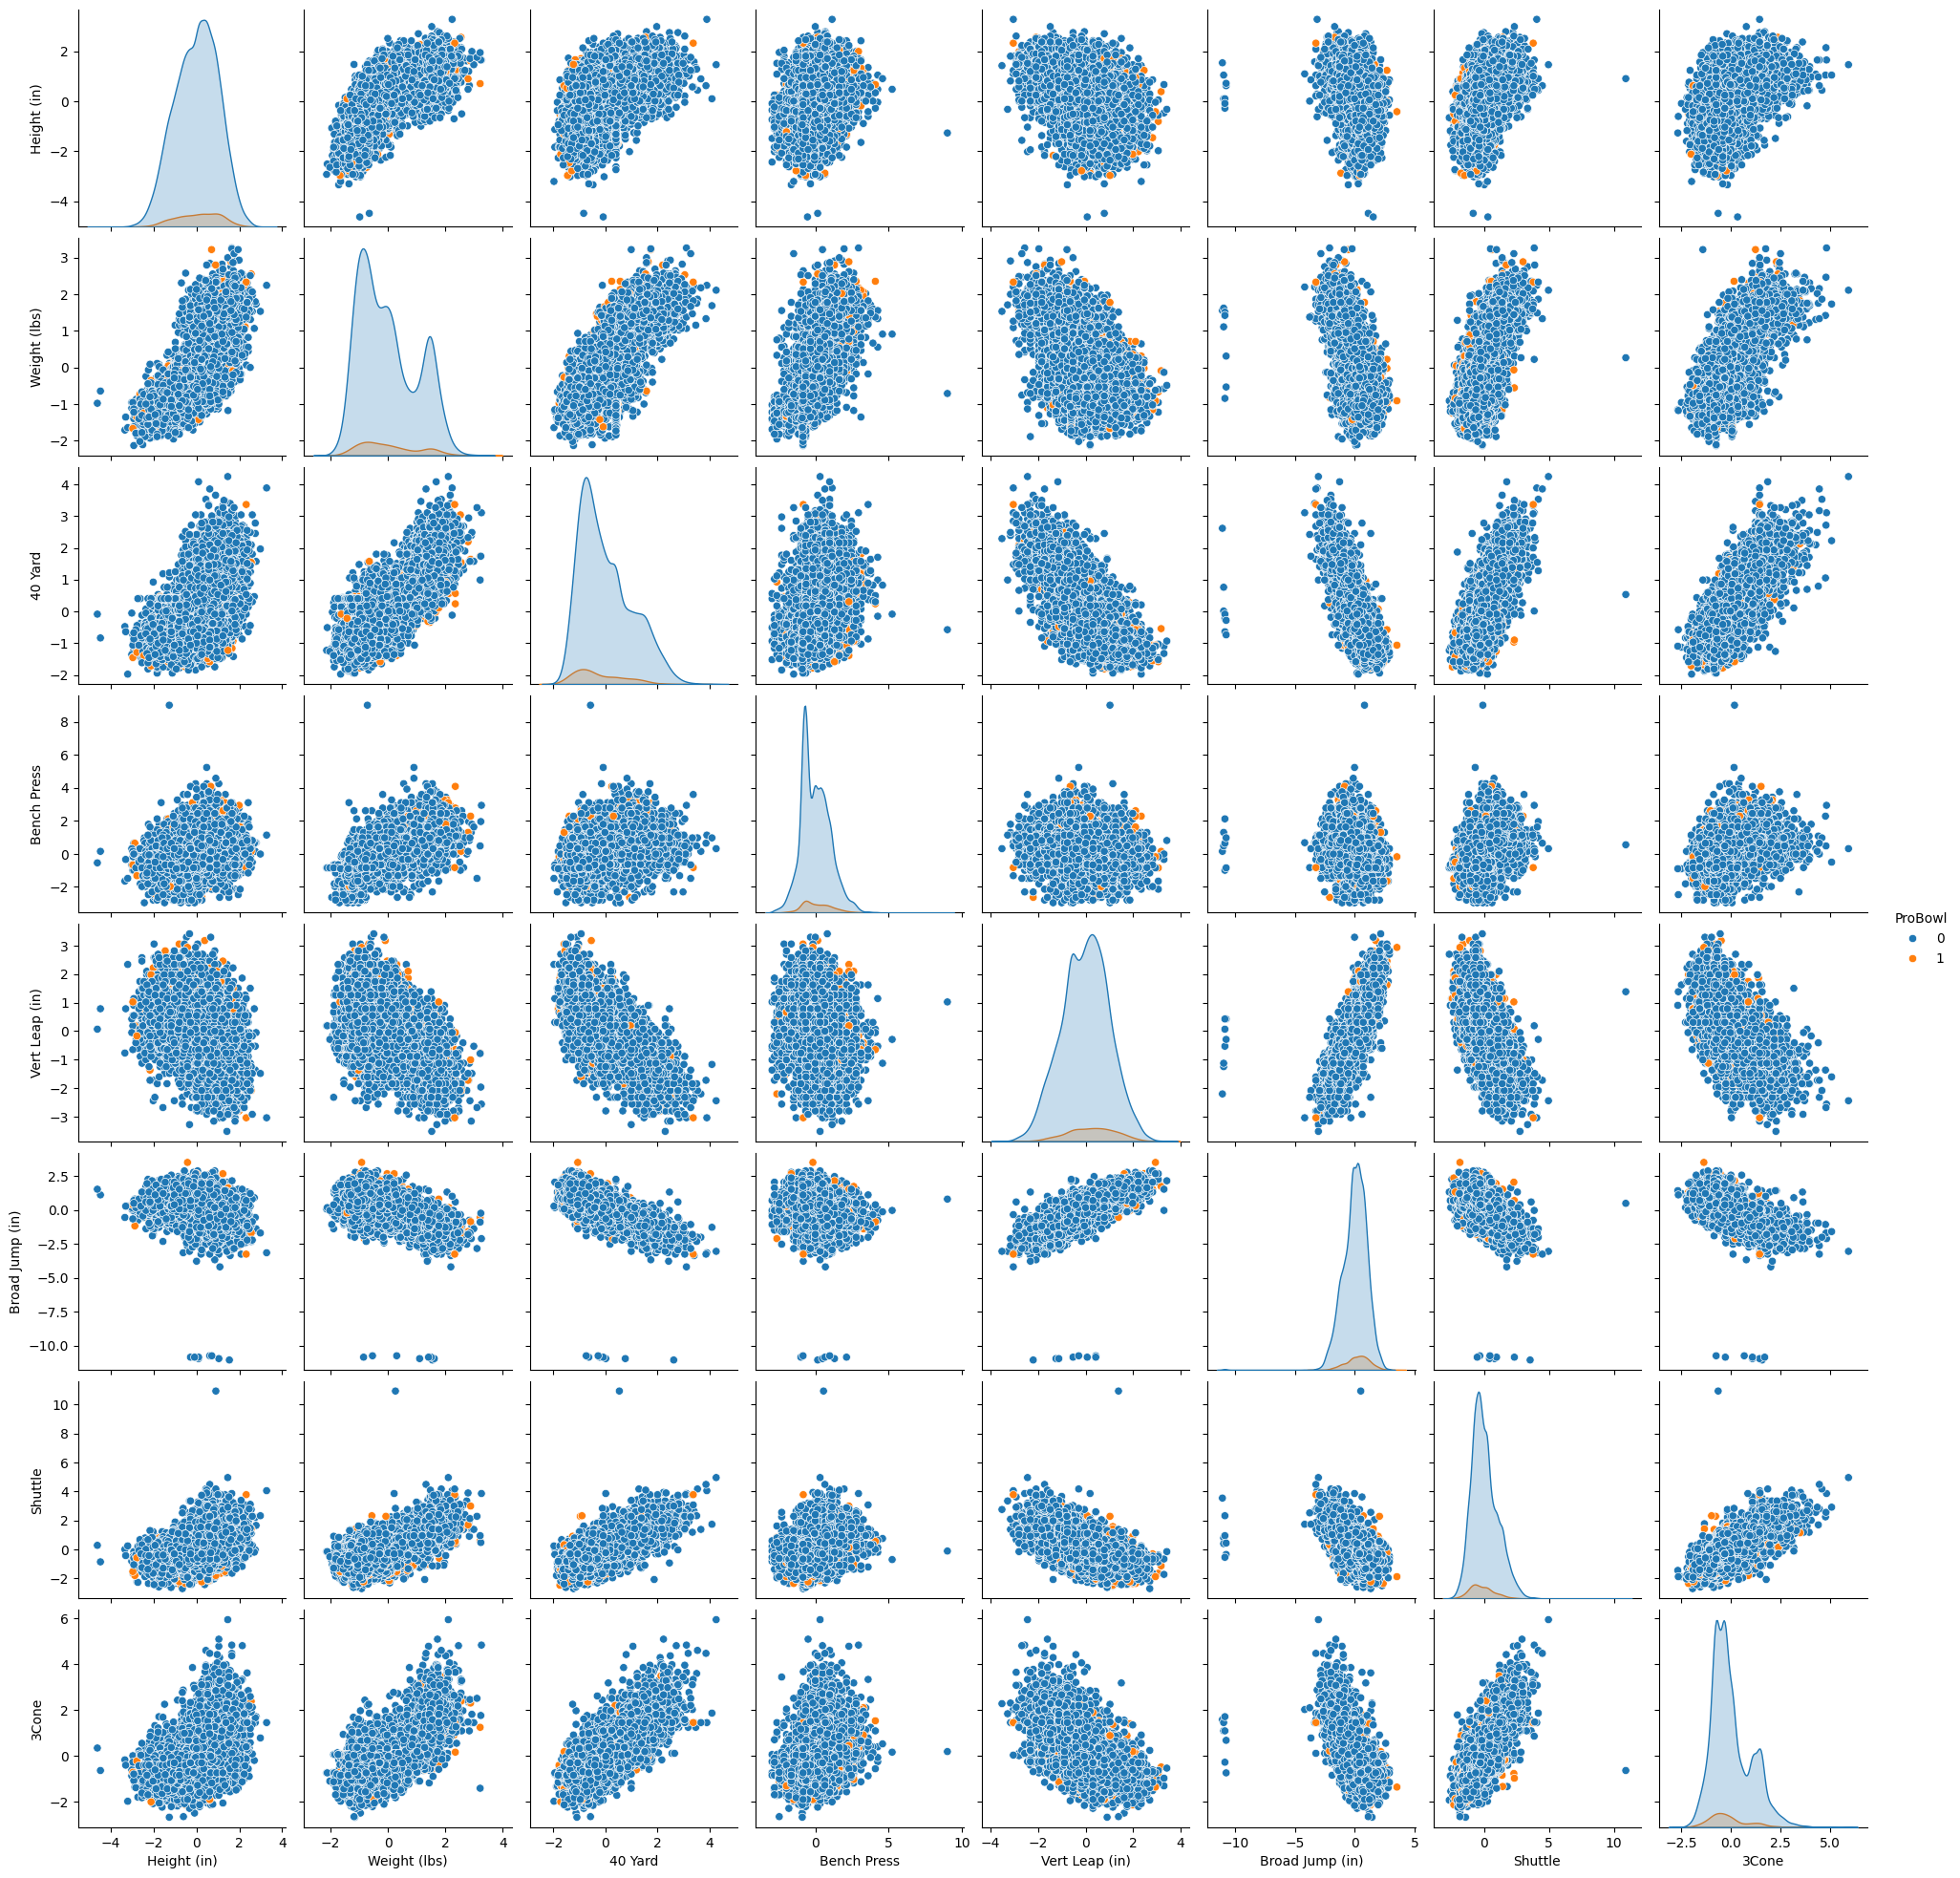

In [6]:
sns.pairplot(df, hue='ProBowl', vars=['Height (in)', 'Weight (lbs)', '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone'])
plt.show()

In [7]:
df.drop(['ProBowl'], axis=1, inplace=True)

In [8]:
kmeans = KMeans(n_clusters=2, random_state=42)  # Number of clusters should be decided based on problem understanding or methods like the Elbow method
kmeans.fit(df)

# Assigning the clusters to each row in the dataframe
df['kmeans_cluster'] = kmeans.labels_

c:\Users\siyun\anaconda3\envs\'nfl_env'\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [9]:
def display_pairplot(df, hue_col):
    sns.pairplot(df, hue=hue_col, vars=['Height (in)', 'Weight (lbs)', '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone'])
    plt.show()

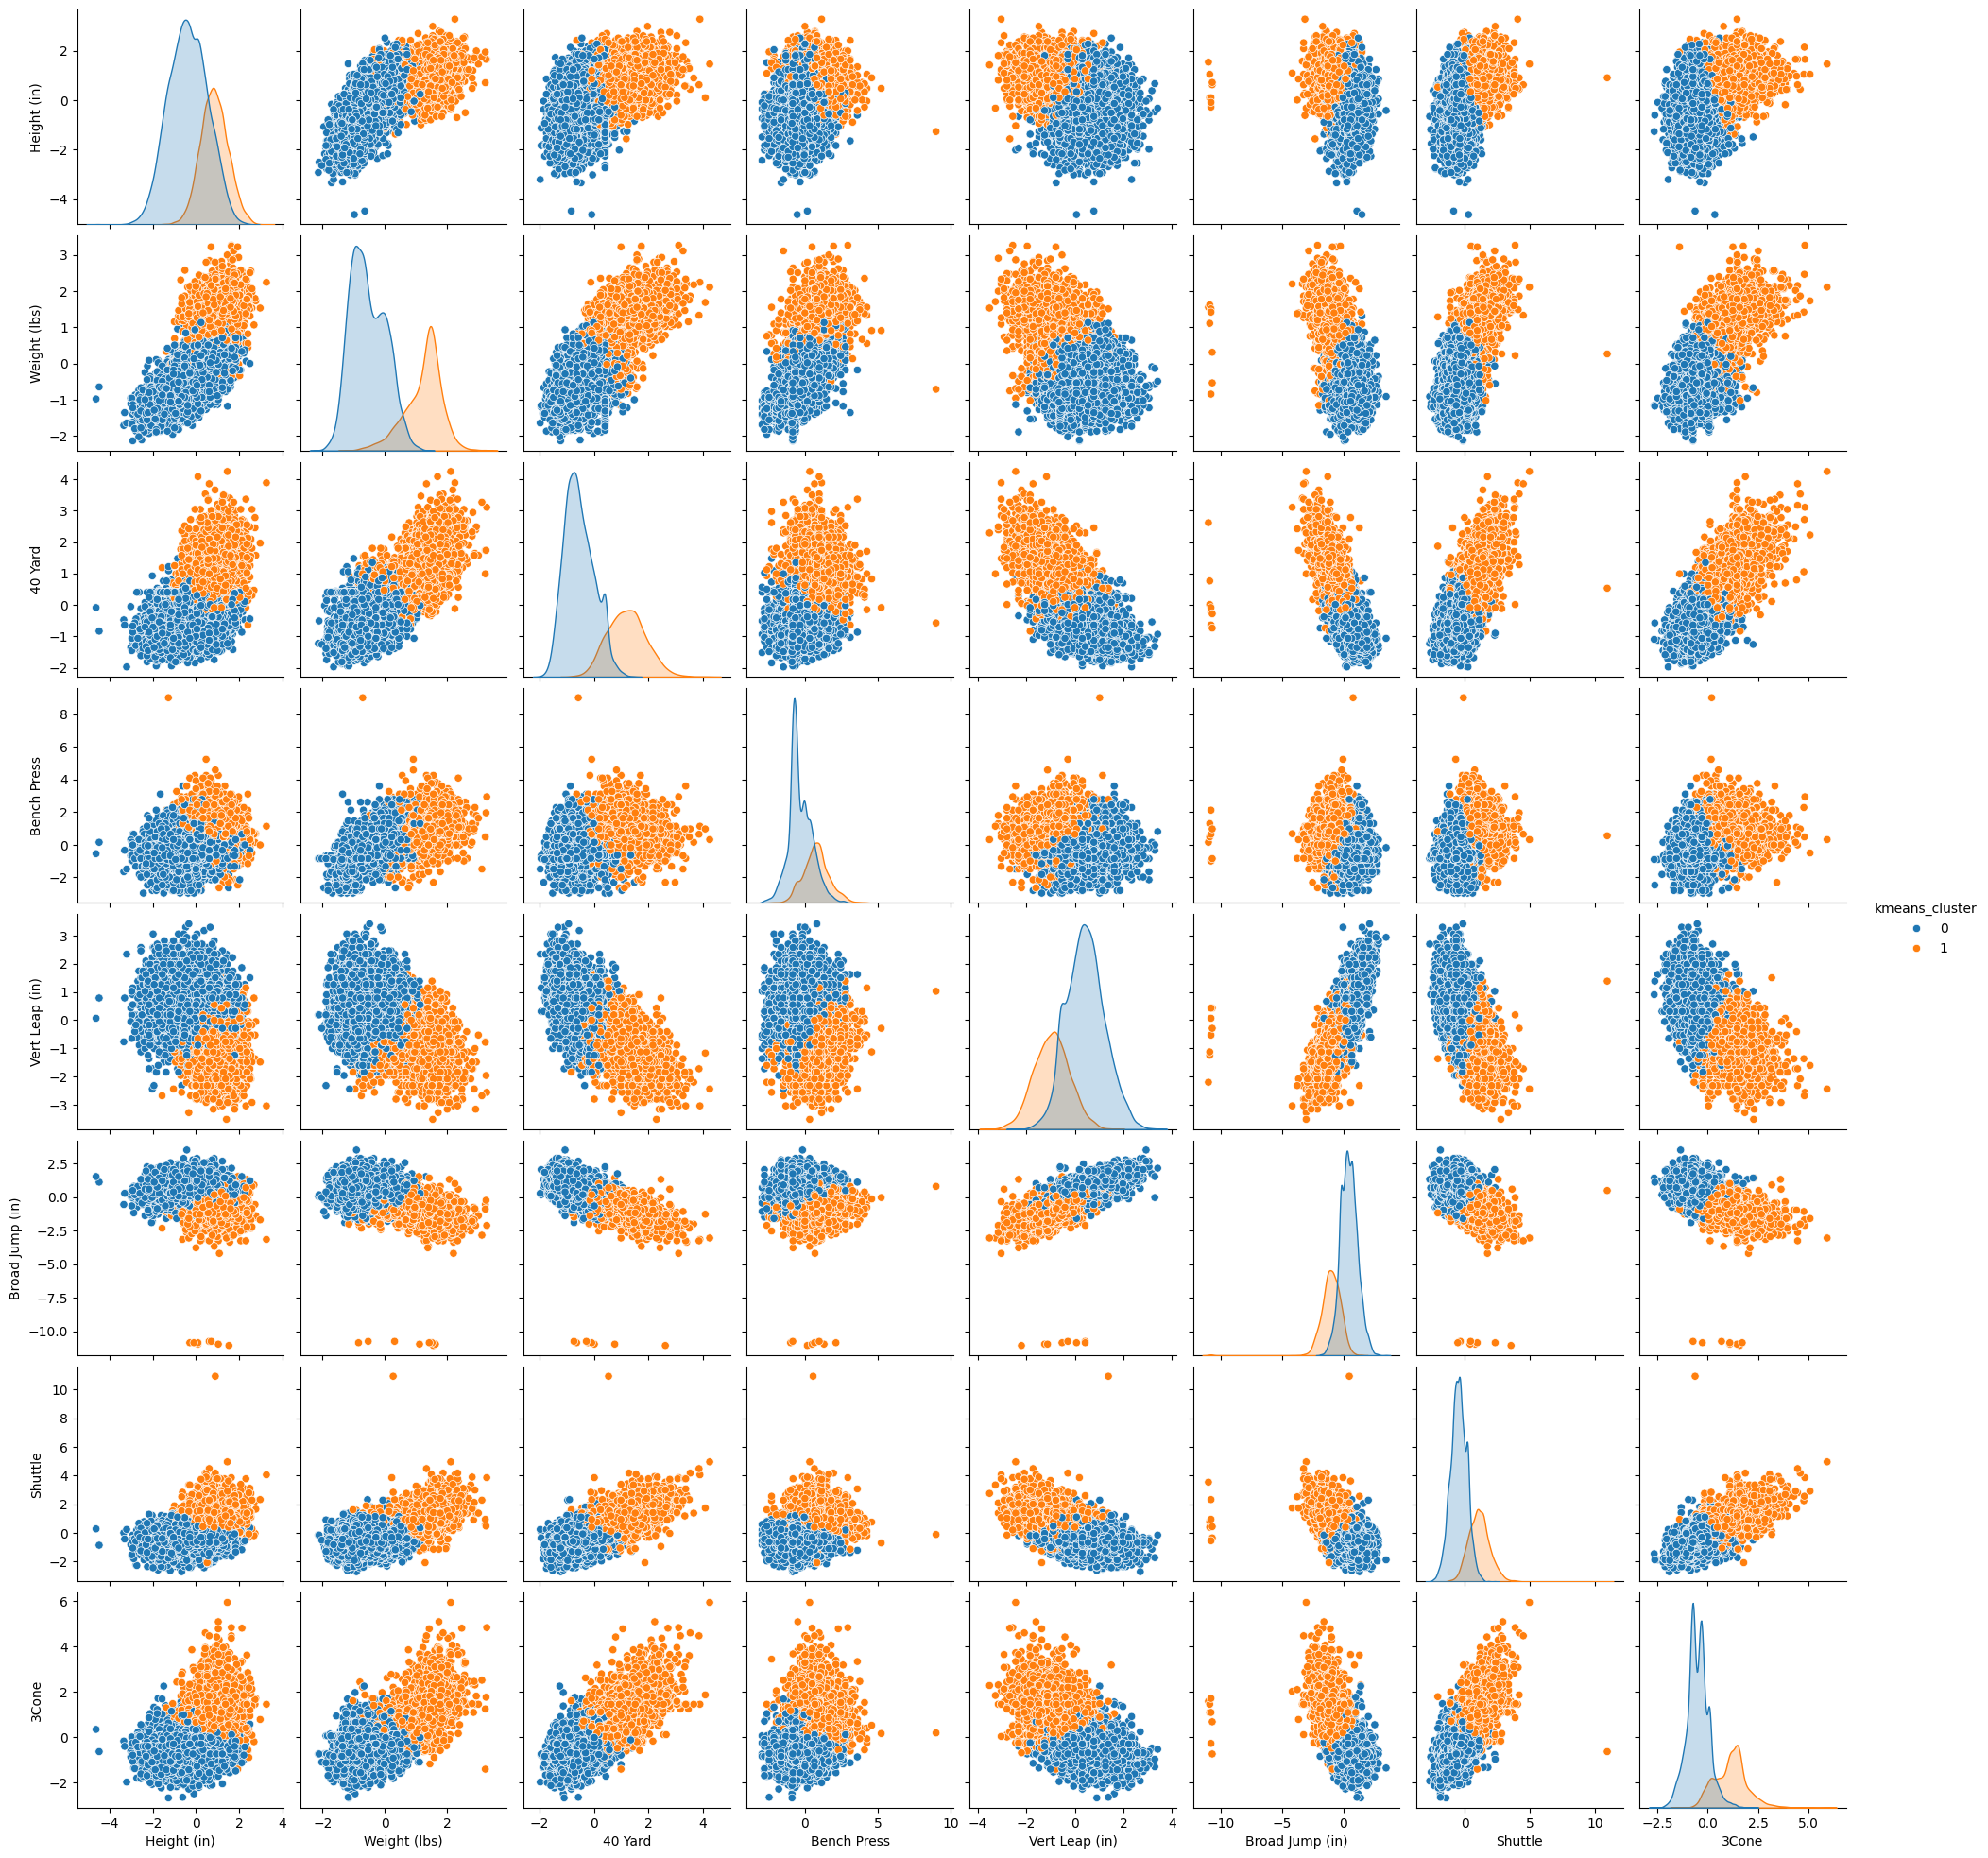

In [10]:
display_pairplot(df, 'kmeans_cluster')

In [11]:
def display_silhouette_plot(df, col, cluster_labels):
    silhouette_vals = silhouette_samples(df, df[col])

    # Silhouette plot
    sns.displot(silhouette_vals, kind='kde')
    plt.show()

    if len(set(cluster_labels)) > 1:
        silhouette_avg = silhouette_score(df, cluster_labels)
        print(f"The average silhouette_score is : {silhouette_avg}")

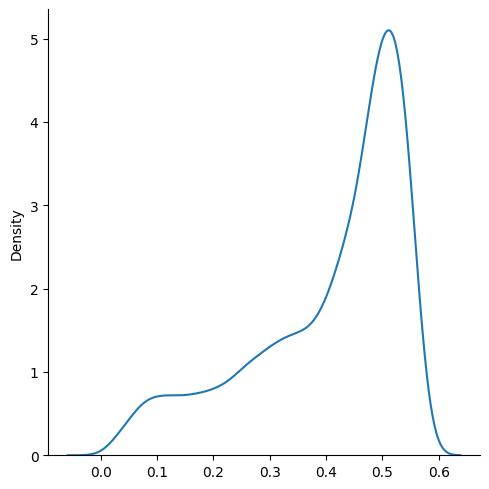

The average silhouette_score is : 0.40510734997496733


In [12]:
display_silhouette_plot(df, 'kmeans_cluster', kmeans.labels_)

In [13]:
df.drop(['kmeans_cluster'], axis=1, inplace=True)

In [14]:
dbscan = DBSCAN(eps=1, min_samples=25)
db_clusters = dbscan.fit_predict(df)

df['DBSCAN_cluster'] = db_clusters

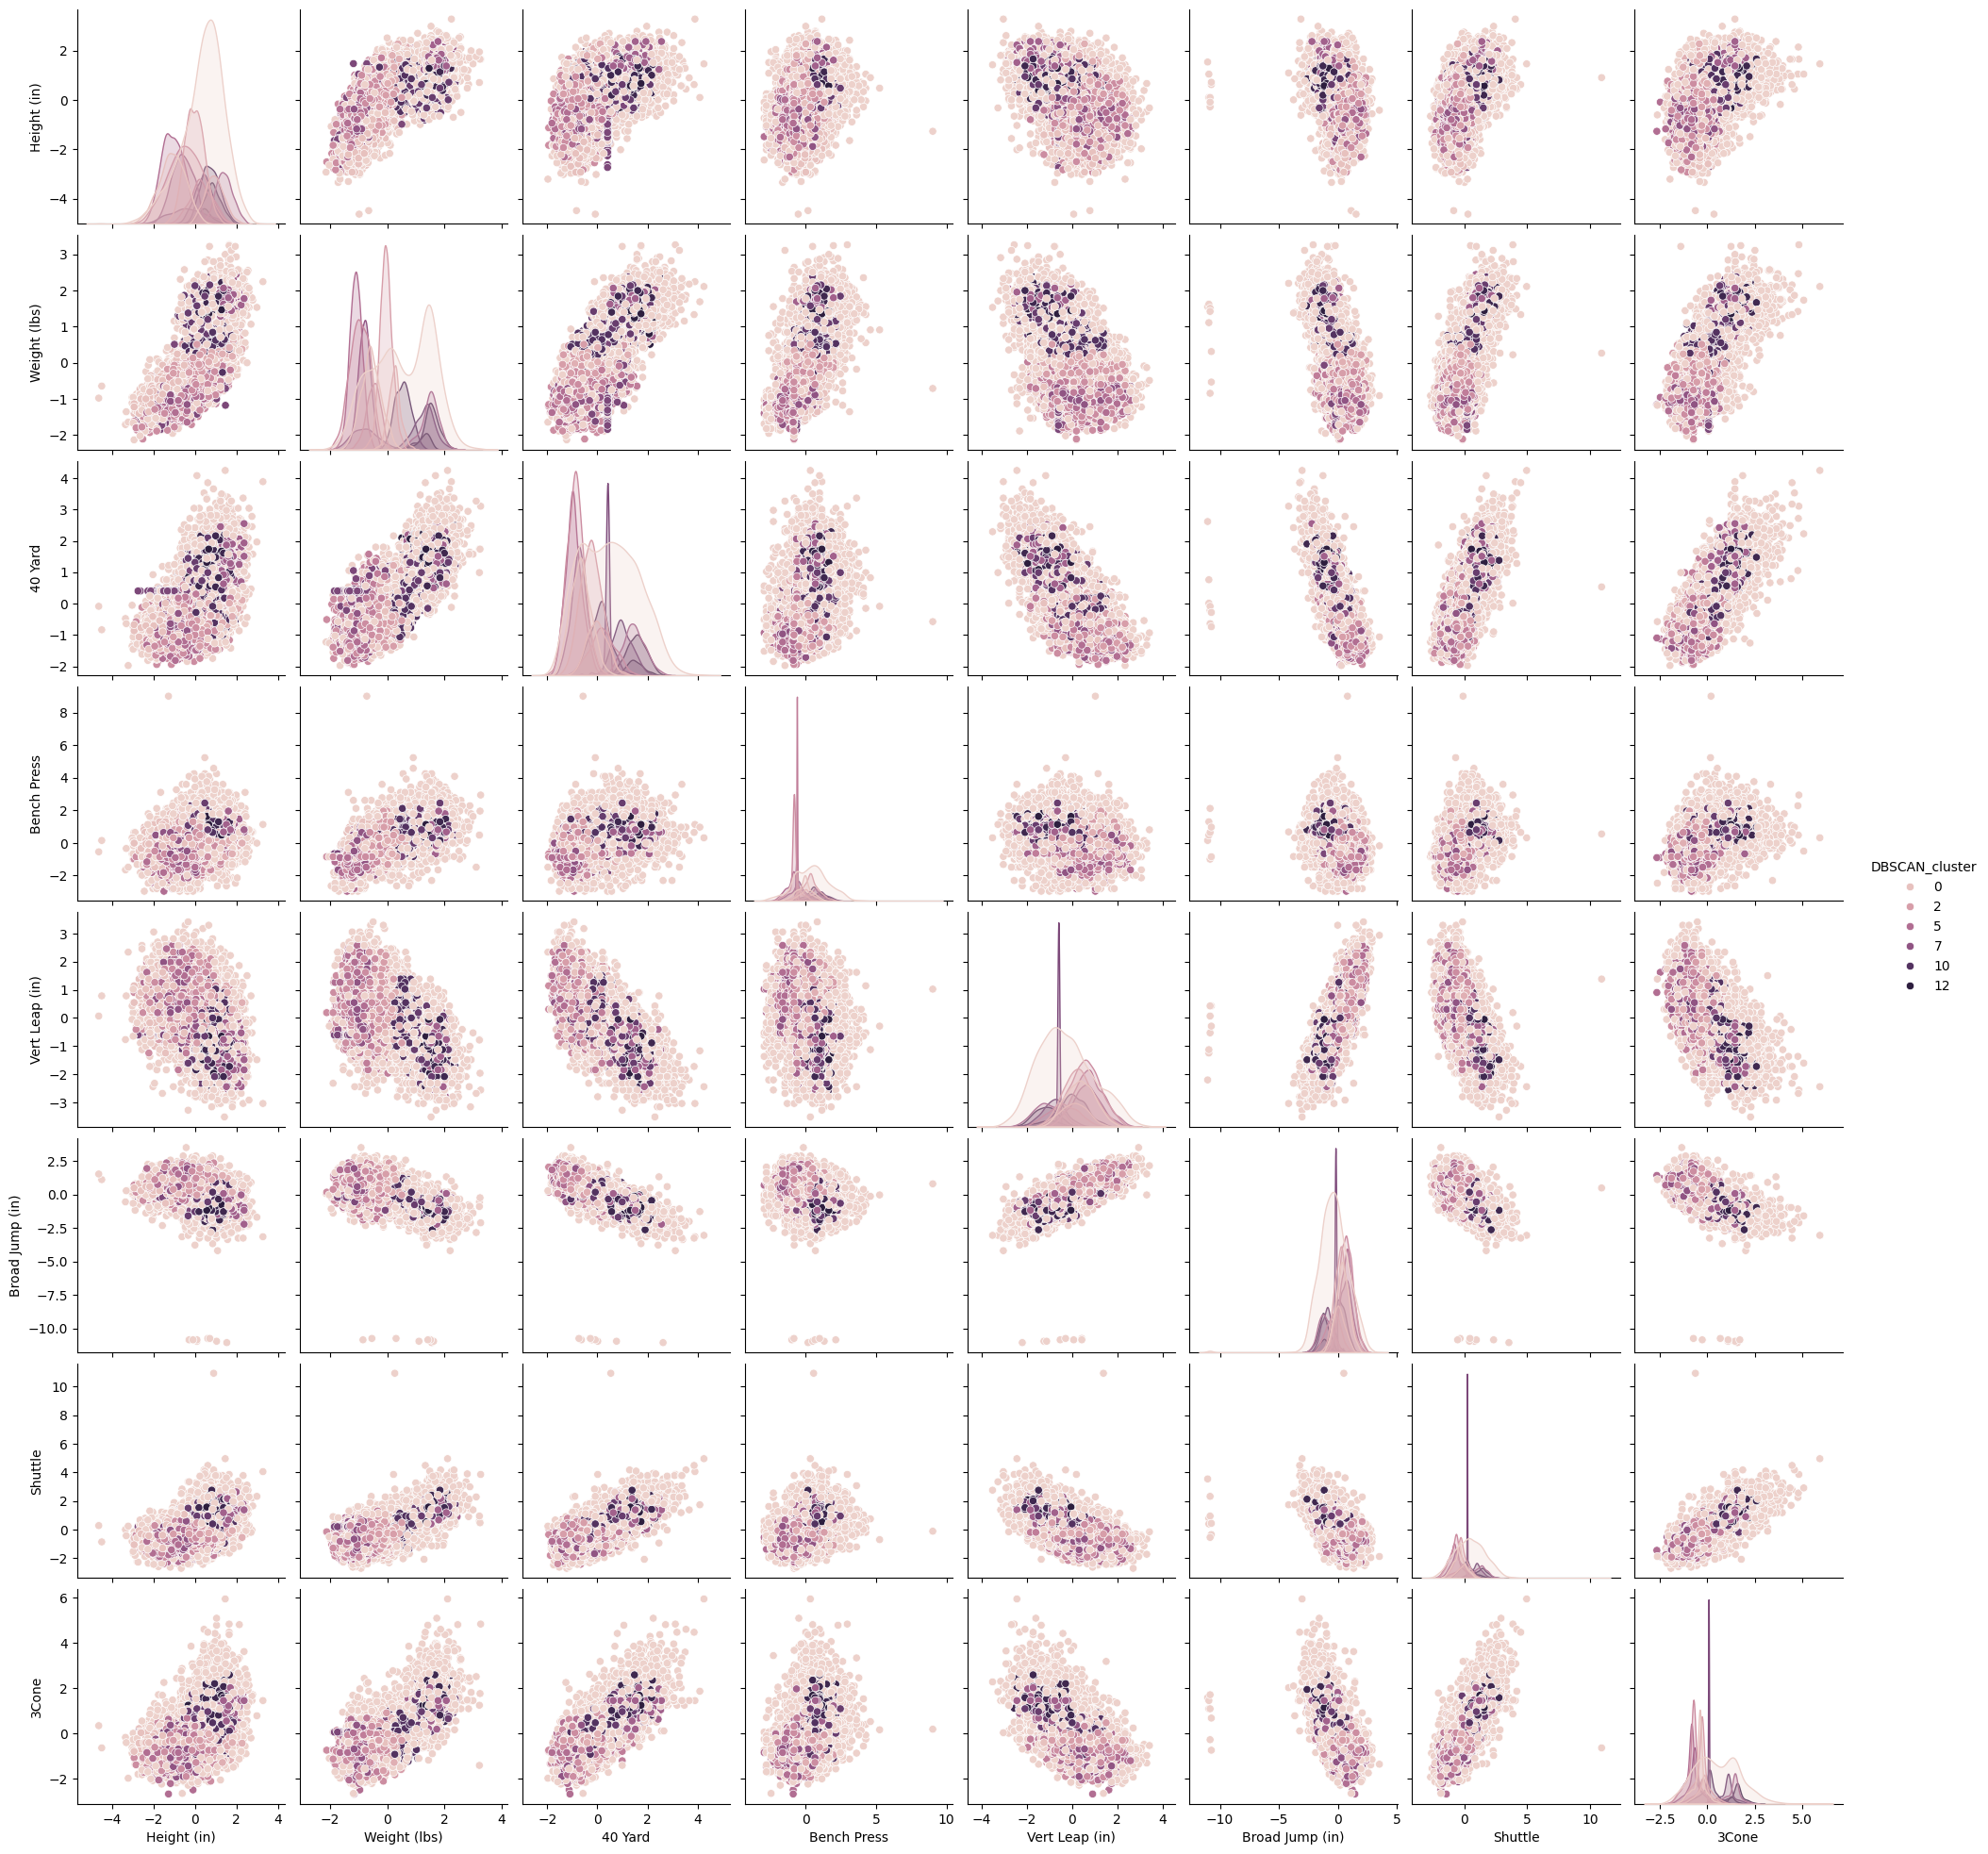

In [15]:
display_pairplot(df, 'DBSCAN_cluster')

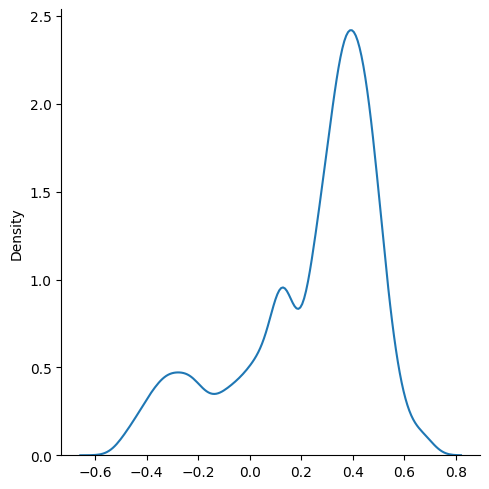

The average silhouette_score is : 0.23324651077000974


In [16]:
display_silhouette_plot(df, 'DBSCAN_cluster', db_clusters)

In [17]:
df.drop(['DBSCAN_cluster'], axis=1, inplace=True)